<a href="https://colab.research.google.com/github/Jefferson-Bueno-Da-Silva/NLP_studies/blob/main/Comparing_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Recuperação e tratamento dos dados

In [86]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data.csv")

In [87]:
le = LabelEncoder()
y = le.fit_transform(train_df["Classe"])

In [88]:
le.classes_

array(['Cardápio', 'Pagamento', 'Saudação'], dtype=object)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(train_df['Sentenca'], y, test_size=0.2, random_state=2)

Treinamento do modelo

In [90]:
forest = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
forest.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [91]:
svm = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', LinearSVC())
])
svm.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', LinearSVC())])

In [92]:
tree = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])
tree.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [98]:
forest_predict = forest.predict(x_test)
svm_predict = svm.predict(x_test)
tree_predict = tree.predict(x_test)

In [130]:
acc_forest = np.round(accuracy_score(y_test, forest_predict), 2)
acc_tree = np.round(accuracy_score(y_test, tree_predict), 2)
acc_svm = np.round(accuracy_score(y_test, svm_predict), 2)



In [145]:
df1 = pd.DataFrame([acc_forest, acc_tree, acc_svm], index=["forest", "tree", "svm"], columns=["accuracy"])
df2 = pd.DataFrame(data=df1, index=["forest", "tree", "svm"])

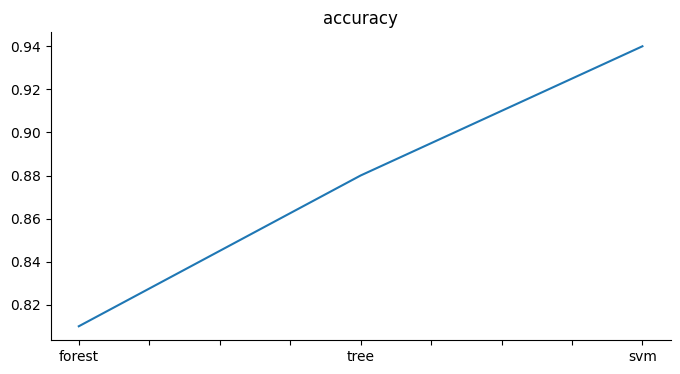

In [146]:
from matplotlib import pyplot as plt
df2['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)